# Import libraries

In [221]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


from collections import Counter
import random

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold

from tqdm import tqdm


%matplotlib inline

In [222]:
import warnings
warnings.filterwarnings("ignore")

In [223]:
data = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')
data.shape

(11914, 16)

In [224]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [225]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Data preparation

In [226]:
'''
Make,
Model,
Year,
Engine HP,
Engine Cylinders,
Transmission Type,
Vehicle Style,
highway MPG,
city mpg
MSRP
'''
features = [
    'Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders',
    'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP'
]

In [227]:
data = data[features]

In [228]:
data = data.rename(columns={'MSRP': 'price'})
data.columns = data.columns.str.replace(' ', '_').str.lower()

In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11845 non-null  float64
 4   engine_cylinders   11884 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   price              11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [230]:
data.nunique()

make                   48
model                 915
year                   28
engine_hp             356
engine_cylinders        9
transmission_type       5
vehicle_style          16
highway_mpg            59
city_mpg               69
price                6049
dtype: int64

In [231]:
data.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
price                 0
dtype: int64

In [232]:
data.engine_hp  =  data.engine_hp.fillna(0)
data.engine_cylinders = data.engine_cylinders.fillna(0)

In [233]:
data.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
price                0
dtype: int64

In [234]:
data.head(3)

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350


In [235]:
data_avg_price =  data.copy()
mean =  data_avg_price['price'].mean()
data_avg_price['above_averge'] = np.where(data_avg_price['price'] >= mean,1,0)

In [236]:
data_avg_price =  data_avg_price.drop('price', axis = 1 )

In [237]:
data_avg_price.head(3)

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_averge
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0


In [238]:
'''
Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. 
Use train_test_split function for that with random_state=1
'''
SEED = 1

In [239]:
df_full_train, df_test = train_test_split(data_avg_price , test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)

assert len(data_avg_price ) == (len(df_train) + len(df_val) + len(df_test))

# Question 1: ROC AUC feature importance

In [240]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
above_averge           int32
dtype: object

In [241]:
df_test.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'above_averge'],
      dtype='object')

In [242]:
y_train = df_train.above_averge.values
y_val = df_val.above_averge.values
y_test = df_test.above_averge.values

In [243]:
# delete target variable from training,val, test  sets
del df_train['above_averge']
del df_val['above_averge']
del df_test['above_averge']

In [244]:
numerical  = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']
categorical = ['make', 'model','transmission_type', 'vehicle_style',]

In [245]:
# Calculate AUC for each numerical variable
auc_scores = {}
for col in df_train[numerical].columns[:-1]:
    auc_scores[col] = roc_auc_score(y_train, df_train[col])

# Invert variables with AUC < 0.5
for col in auc_scores:
    if auc_scores[col] < 0.5:
        auc_scores[col] = roc_auc_score(y_train, -df_train[col])

# Print AUC scores
print(auc_scores)
# The highest AUC has 'engine_hp': 0.917 

{'year': 0.687551492804683, 'engine_hp': 0.9171031265539011, 'engine_cylinders': 0.766116490165669, 'highway_mpg': 0.6330587871772013}


# Question 2: Training the model

In [246]:
'''
Apply one-hot-encoding using DictVectorizer and train 
the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

'''

"\nApply one-hot-encoding using DictVectorizer and train \nthe logistic regression with these parameters:\n\nLogisticRegression(solver='liblinear', C=1.0, max_iter=1000)\n\n"

In [247]:
dv = DictVectorizer(sparse = False)
train_dicts = df_train[categorical + numerical].to_dict(orient = 'records')
X_train = dv.fit_transform(train_dicts)
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [248]:
# validation- do not fit, use only transform
val_dicts =  df_val[categorical + numerical].to_dict(orient = 'records')
X_val = dv.transform(val_dicts)
y_pred = model.predict_proba(X_val)[:, 1]
 

In [249]:
# validation dataset
roc_auc_score(y_val, y_pred).round(3)

0.98

# Question 3: Precision and Recall

In [250]:
'''
Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
For each threshold, compute precision and recall
Plot them

'''

'\nEvaluate the model on all thresholds from 0.0 to 1.0 with step 0.01\nFor each threshold, compute precision and recall\nPlot them\n\n'

In [251]:
# function to create dataframe with tpr and fpr

def precision_recall_dataframe(y_val, y_pred):
    
    threshholds  = np.arange(0.0, 1.0, step = 0.01)
    scores  = []


    for t in threshholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >=  t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
        
        precision = tp / (tp + fp)
        recall =  tp / (tp + fn)
        scores.append( (t, precision , recall   ))
        
    columns = [ 'thresholds',  "precision", "recall"]
    scores_df = pd.DataFrame(scores, columns  =  columns)
        
    return scores_df

In [252]:
df_prec_recall = precision_recall_dataframe(y_val, y_pred)
#df_prec_recall['recall'] 

In [253]:
def find_min_treshold(thresholds, precision, recall):
    index = np.argmin(np.abs(precision - recall))
    return thresholds[index]
    

In [254]:
find_min_treshold(df_prec_recall.thresholds,
                  df_prec_recall.precision, df_prec_recall.recall)

0.49

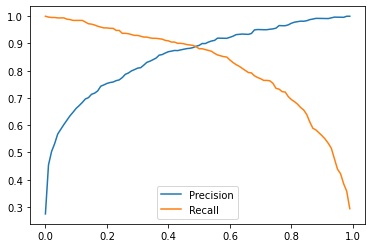

In [255]:
plt.plot(df_prec_recall.thresholds, df_prec_recall['precision'], label = 'Precision')
plt.plot(df_prec_recall.thresholds, df_prec_recall.recall, label = 'Recall' )
plt.legend()
# 0.49

# Question 4: F1 score

In [256]:
def f1_score(thresholds, precision, recall):
    f1_scores = []
    
    for i in range(len(precision)):
        f1 = (2 * precision[i] *  recall[i]) /  (precision[i] + recall[i])
        f1_scores.append(f1)
    
    return f1_scores
    

In [257]:
df_prec_recall['f1_score']= f1_score(df_prec_recall.thresholds, df_prec_recall.precision, df_prec_recall.recall)

In [258]:
df_prec_recall[df_prec_recall.f1_score == df_prec_recall.f1_score.max()]

# at 0.51 threshold F1 is maximal

,thresholds,precision,recall,f1_score
51,0.51,0.9,0.880734,0.890263


# Question 5: 5-Fold CV

In [259]:
'''
KFold(n_splits=5, shuffle=True, random_state=1)
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
'''

"\nKFold(n_splits=5, shuffle=True, random_state=1)\nLogisticRegression(solver='liblinear', C=1.0, max_iter=1000)\n"

In [260]:
def train(df_train, y_train, C= 1.0):
    dicts = df_train[categorical + numerical].to_dict(orient = 'records')
    
    dv = DictVectorizer(sparse = False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(C = C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [261]:
def predict(df, dv, model):
    dicts  = df[categorical + numerical].to_dict(orient = 'records')
    
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[: , 1]
    
    return y_pred

In [262]:
y_pred = predict(df_val, dv, model)

In [263]:
kfold  = KFold(n_splits=5, shuffle=True, random_state=1)

In [264]:
train_ind, val_ind = next(kfold.split(df_full_train))

In [265]:
len(train_ind), len(val_ind)

(7624, 1907)

In [266]:
len(df_full_train)

9531

In [267]:
df_train = df_full_train.iloc[train_ind]
df_val = df_full_train.iloc[val_ind]

In [268]:
df_train.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'above_averge'],
      dtype='object')

In [269]:
scores = []

for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.above_averge.values
    y_val = df_val.above_averge.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('C=%s %.3f +- %.3f' % ( C, np.mean(scores), np.std(scores).round(3) )  )

5it [01:36, 19.35s/it]

C=0.001 0.981 +- 0.003


# Question 6: Hyperparemeter Tuning

In [270]:
'''
C = [0.01, 0.1, 0.5, 10]
LogisticRegression(solver='liblinear', C=C, max_iter=1000)

'''

"\nC = [0.01, 0.1, 0.5, 10]\nLogisticRegression(solver='liblinear', C=C, max_iter=1000)\n\n"

In [273]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    scores = []

    for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.above_averge.values
        y_val = df_val.above_averge.values

        dv, model = train(df_train, y_train)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

print('C=%s %.3f +- %.3f' % ( C, np.mean(scores), np.std(scores).round(3) )  )

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]
0it [00:00, ?it/s]
1it [00:17, 17.46s/it]
2it [00:35, 18.01s/it]
3it [01:00, 21.16s/it]
4it [01:24, 22.17s/it]
5it [01:51, 22.25s/it]
 14%|███████████▊                                                                       | 1/7 [01:51<11:07, 111.25s/it]
0it [00:00, ?it/s]
1it [00:26, 26.84s/it]
2it [00:59, 30.01s/it]
3it [01:32, 31.45s/it]
4it [01:57, 28.92s/it]
5it [02:22, 28.42s/it]
 29%|███████████████████████▋                                                           | 2/7 [04:13<10:47, 129.40s/it]
0it [00:00, ?it/s]
1it [00:22, 22.57s/it]
2it [00:45, 22.51s/it]
3it [01:06, 22.23s/it]
4it [01:27, 21.63s/it]
5it [01:51, 22.21s/it]
 43%|███████████████████████████████████▌                                               | 3/7 [06:04<08:04, 121.03s/it]
0it [00:00, ?it/s]
1it [00:19, 19.25s/it]
2it [00:39, 20.10s/it]
3it [01:00, 20.21s/it]
4it [01:21, 20.69s/it]
5it [01

C=10 0.981 +- 0.003


In [ ]:
# Learning in public
#https://proximal-judge-1a6.notion.site/Model-evaluation-metrics-for-classification-tasks-403b2d445ad0476681dcc0e350711dc0